# Example usage of JSME and JsMol widgets

In [1]:
from qdk_chemistry.widgets import JsmeWidget, JsmolWidget

1. Design molecule

In [2]:
w = JsmeWidget()

In [3]:
w

In [4]:
mol = w.to_mol(add_hs=True)

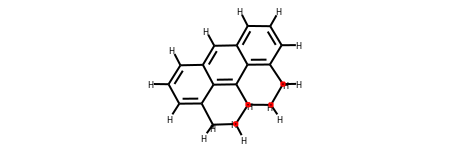

In [5]:
mol

2. Generate XYZ file from SMILES using rdkit

In [6]:
JsmolWidget.from_mol(mol)

JsmolWidget(layout=Layout(align_self='stretch', height='400px'))

## Larger example: Beta carotene

In [7]:
w2 = JsmeWidget(smiles="C/C(=C\\C=C\\C=C(C)\\C=C\\C=C(C)\\C=C\\C1=C(C)CCCC1(C)C)/C=C/C=C(C)/C=C/C2=C(C)CCCC2(C)C")

In [8]:
w2

In [9]:
bc = w2.to_mol(add_hs=True)

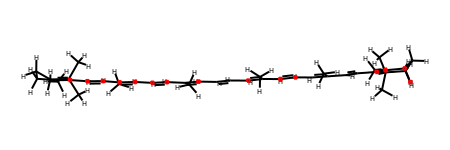

In [10]:
bc

In [11]:
JsmolWidget.from_mol(bc)

Solution did not converge. Lowest energy found: 103.32012579726138


JsmolWidget(layout=Layout(align_self='stretch', height='400px'))

## Larger example: FeMoCo

In [12]:
w3 = JsmeWidget(smiles="O=C(O)CCC1(CC(=O)O)O[Mo]45(OC1=O)[S+]6[Fe]3%12S[Fe]2%10[S+]7[Fe]8[S+]2[Fe]9%11S[Fe]%14([S+]34)[S+]5[Fe]6%13S[Fe]7([S+]89)[Cr-4]%10%11%12%13%14")
# Replace Carbon atom with Chromium to circumvent RDKit valence issue

In [13]:
w3

In [14]:
femoco = w3.to_mol(add_hs=True)

RDKit ERROR: [09:21:40] UFFTYPER: Unrecognized atom type: Mo5 (11)
RDKit ERROR: [09:21:40] UFFTYPER: Unrecognized charge state for atom: 15
RDKit ERROR: [09:21:40] UFFTYPER: Unrecognized atom type: Fe6 (16)
RDKit ERROR: [09:21:40] UFFTYPER: Unrecognized atom type: Fe6 (18)
RDKit ERROR: [09:21:40] UFFTYPER: Unrecognized charge state for atom: 19
RDKit ERROR: [09:21:40] UFFTYPER: Unrecognized atom type: Fe5 (20)
RDKit ERROR: [09:21:40] UFFTYPER: Unrecognized charge state for atom: 21
RDKit ERROR: [09:21:40] UFFTYPER: Unrecognized atom type: Fe6 (22)
RDKit ERROR: [09:21:40] UFFTYPER: Unrecognized atom type: Fe6 (24)
RDKit ERROR: [09:21:40] UFFTYPER: Unrecognized charge state for atom: 25
RDKit ERROR: [09:21:40] UFFTYPER: Unrecognized charge state for atom: 26
RDKit ERROR: [09:21:40] UFFTYPER: Unrecognized atom type: Fe6 (27)
RDKit ERROR: [09:21:40] UFFTYPER: Unrecognized atom type: Fe6 (29)
RDKit ERROR: [09:21:40] UFFTYPER: Unrecognized charge state for atom: 30
RDKit ERROR: [09:21:40] UF

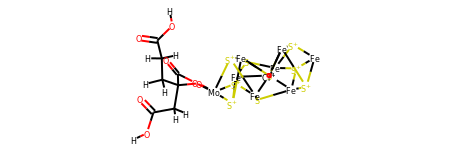

In [15]:
femoco

In [16]:
JsmolWidget.from_mol(femoco)

Solution did not converge. Lowest energy found: -1.0


JsmolWidget(layout=Layout(align_self='stretch', height='400px'))